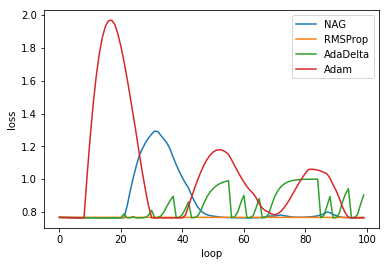

In [10]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import *
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import random
X_train ,y_train = load_svmlight_file("a9a.txt", n_features=123)
X_test ,y_test = load_svmlight_file("a9a.t", n_features=123)

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0


m, n = np.shape(X_train)
# w = np.ones((n, 1))
a = 0.01
loop = 100
#loss
Train_NAG = []
Test_NAG = []
Train_RMSProp = []
Test_RMSProp = []
Train_AdaDelta = []
Test_AdaDelta = []
Train_Adam = []
Test_Adam = []

def h(z):
    return 1/(1+exp(-z))

def grad(w):
    i = (1-y_train * (X_train * w) < 0)
    y = y_train.copy()
    y[i] = 0
    random_num = np.random.randint(0,m)
    g = w - ((X_train)[random_num].T * y[random_num]).reshape(123,1)
    return g

def loss(x,y,w):
    loss = 1 - y* x.dot(w)
    loss[loss < 0] = 0
    cost = (0.5 * np.dot(w.transpose(),w).sum() + loss.sum())/ x.shape[0]
    return  cost

def NAG(w):
    v = 0
    i= 0
    loop_now = 0
    while loop_now < loop:
        loop_now += 1
        random_num = random.randint(0,m)
        g = grad(w - 0.9 * v)
        v = 0.9 * v + a * g
        w = w - v
        Train_NAG.append(loss(X_train , y_train ,w))
        Test_NAG.append(loss(X_test , y_test ,w))

def RMSProp(w):
    v = 0
    G = 0 
    loop_now = 0
    random_num = random.randint(0,m)
    while loop_now < loop:
        loop_now += 1
        g = grad(w - 0.9 * v)
        G =  0.9* G + (0.1 *(g**2)).sum()
        w = w - a*g/math.sqrt(G + 1e-8)
        Train_RMSProp.append(loss(X_train , y_train , w ))
        Test_RMSProp.append(loss(X_test , y_test , w ))    
    
def AdaDelta(w):   
    G = 0  
    theta = 0
    t = 0
    loop_now = 0
    random_num = random.randint(0,m)
    while loop_now < loop:
        loop_now += 1
        g = grad(w)
        G = 0.9 * G + (0.1 * (g**2)).sum()  
        theta = - math.sqrt(t + 1e-8) * g/math.sqrt(G + 1e-8)
        t = 0.9 * t + (0.1 * (theta**2) ).sum()
        #用math.sqrt(dt + 1e-8)来估计学习率
        w = w + 3000 * theta
        Train_AdaDelta.append(loss(X_train , y_train , w ))
        Test_AdaDelta.append(loss(X_test , y_test , w ))
    
def Adam(w):
    t = 0 
    m = 0  
    G = 0  
    b1 = 0.9  
    b2 = 0.999
    loop_now = 0
    random_num = random.randint(0,m)
    while loop_now < loop:
        loop_now += 1
        t += 1 
        g = grad(w)
        m = b1*m + ((1-b1)*g).sum() 
        G = b2*G + ((1-b2)*(g**2)).sum()      
        w = w - a * (m/(1-(b1**t)))/(math.sqrt(G/(1-(b2**t))) + 1e-8)
        Train_Adam.append (loss(X_train , y_train , w ))
        Test_Adam.append (loss(X_test , y_test , w ))
    
    
if __name__=='__main__':
    w = np.ones((n, 1))
    NAG(w)
    w = np.ones((n, 1))
    RMSProp(w)
    w = np.ones((n, 1))
    AdaDelta(w)
    w = np.ones((n, 1))
    Adam(w)
    plt.plot(Test_NAG, label='NAG')
    plt.plot(Test_RMSProp, label='RMSProp')
    plt.plot(Test_AdaDelta, label='AdaDelta')
    plt.plot(Test_Adam, label='Adam')
    plt.xlabel('loop')
    plt.ylabel('loss')
    plt.legend()
    plt.show()